<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/tp1_parte2_flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delays

In [327]:
# ! pip install -q kaggle

In [328]:
# from google.colab import files
# files.upload()

In [329]:
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle competitions download -c flight-delays-spring-2018

In [330]:
# ! mkdir datay
# ! unzip flight-delays-spring-2018.zip -d data

In [331]:
import pandas as pd

df = pd.read_csv("/content/data/flight_delays_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


# VISUALIZACION 1

In [332]:
df = df[["Month", "dep_delayed_15min","Dest"]]
df = df.groupby(["Month","dep_delayed_15min"]).count().reset_index()
df = df.rename(columns={'Dest': 'Count'})
df["Month"] = df["Month"].map(lambda x: int(x[2:]))

In [333]:
plt.rcParams["figure.figsize"] = [20,12]


Text(0.5, 1.0, 'Cantidad de vuelos retrasados Vs. Días de la semana')

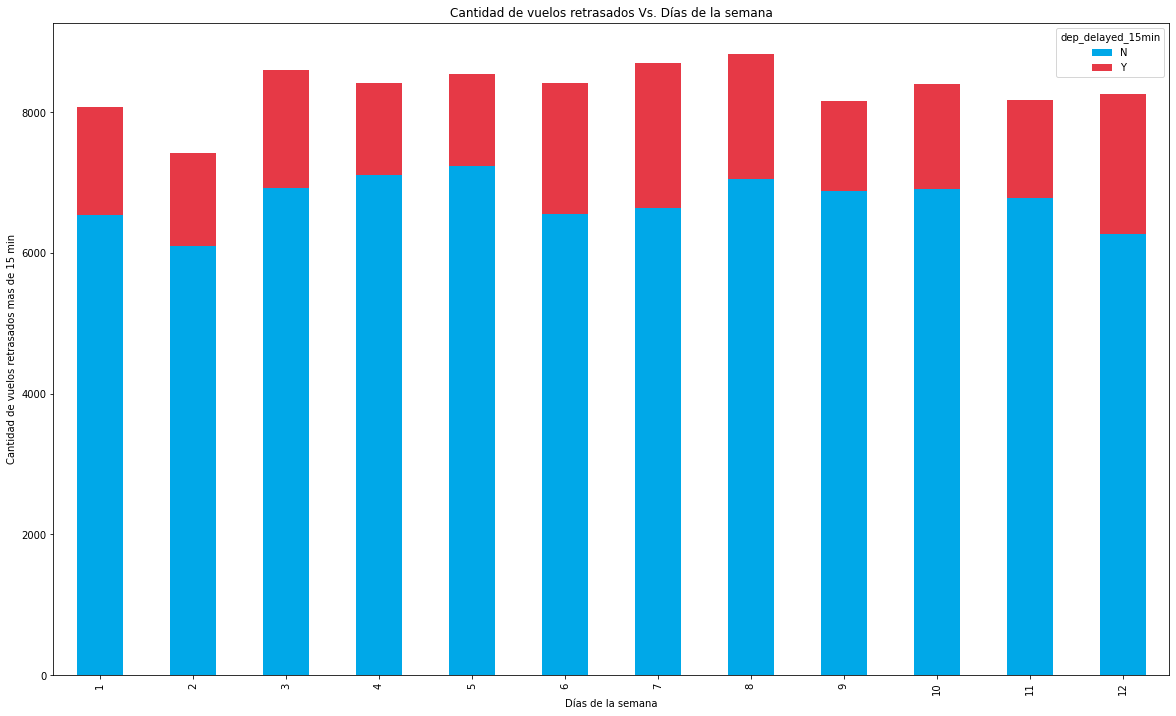

In [334]:
matriz = df.pivot_table(values="Count", index="Month", columns='dep_delayed_15min')
matriz

matriz.plot(kind='bar', stacked=True, color=['#00a8e8', '#e63946'])

# labels for x & y axis
plt.xlabel('Días de la semana')
plt.ylabel('Cantidad de vuelos retrasados mas de 15 min')
 
# title of plot
plt.title('Cantidad de vuelos retrasados Vs. Días de la semana')


# VISUALIZACIÓN 2

In [335]:
plt.rcParams["figure.figsize"] = [6,4]

In [336]:
df = pd.read_csv("/content/data/flight_delays_train.csv")

In [337]:
#Tomo solo los vuelos retrasados +15min.
df = df[ df["dep_delayed_15min"] == "Y"]
df.reset_index(inplace=True)


In [338]:
#Tomo los 10 aeropuertos origen de la mayor cantidad de vuelos retrasados
top_delayed_origin = df["Origin"].value_counts(ascending=False).head(10)
top_delayed_origin

ATL    1506
ORD    1254
DFW     902
DEN     575
LAX     552
LAS     546
EWR     538
IAH     492
PHX     491
DTW     401
Name: Origin, dtype: int64

In [339]:
#Tomo los 10 aeropuertos destino de la mayor cantidad de vuelos retrasados
top_delayed_dest = df["Dest"].value_counts(ascending=False).head(10)
top_delayed_dest

ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
LAS     520
PHX     464
DEN     457
IAH     409
LGA     397
Name: Dest, dtype: int64

In [340]:
df = df[ df['Origin'].isin(top_delayed_origin.index) ]
df = df[ df['Dest'].isin(top_delayed_dest.index) ]

df.reset_index(inplace=True, drop=True)
df.drop(["index"], axis=1, inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-2,c-3,c-5,1920,WN,LAX,PHX,370,Y
1,c-9,c-16,c-5,843,AA,ORD,DEN,888,Y
2,c-3,c-17,c-5,1657,CO,PHX,IAH,1009,Y
3,c-7,c-13,c-3,1335,CO,LAS,IAH,1222,Y
4,c-7,c-31,c-1,45,DL,LAX,ATL,1946,Y
...,...,...,...,...,...,...,...,...,...
1609,c-12,c-6,c-2,1223,NW,DTW,ORD,235,Y
1610,c-10,c-20,c-4,1755,UA,IAH,DEN,861,Y
1611,c-1,c-28,c-5,1930,UA,ATL,ORD,606,Y
1612,c-12,c-9,c-5,1159,HP,LAS,LAX,236,Y


In [341]:
df = df[["Origin", "Dest","dep_delayed_15min"]]

In [342]:
df = df.groupby(["Origin", "Dest"]).count()
df

dep_delayed_15min
Origin Dest                   
ATL    DEN                  15
       DFW                  32
       EWR                  39
       IAH                  19
       LAS                  11
...                        ...
PHX    EWR                   9
       IAH                  12
       LAS                  34
       LAX                  26
       ORD                  15

[87 rows x 1 columns]

In [343]:
df.reset_index(inplace=True)
df

,Origin,Dest,dep_delayed_15min
0,ATL,DEN,15
1,ATL,DFW,32
2,ATL,EWR,39
3,ATL,IAH,19
4,ATL,LAS,11
...,...,...,...
82,PHX,EWR,9
83,PHX,IAH,12
84,PHX,LAS,34
85,PHX,LAX,26


In [344]:
matriz = df.pivot_table(values="dep_delayed_15min", index="Origin", columns='Dest')
matriz.fillna(0)

Dest,ATL,DEN,DFW,EWR,IAH,LAS,LAX,LGA,ORD,PHX
Origin,,,,,,,,,,
ATL,0.0,15.0,32.0,39.0,19.0,11.0,30.0,50.0,30.0,8.0
DEN,14.0,0.0,21.0,7.0,9.0,22.0,16.0,7.0,28.0,17.0
DFW,28.0,19.0,0.0,20.0,18.0,15.0,25.0,16.0,37.0,24.0
DTW,19.0,12.0,10.0,25.0,9.0,10.0,6.0,21.0,20.0,8.0
EWR,27.0,13.0,7.0,0.0,22.0,11.0,7.0,0.0,30.0,3.0
IAH,17.0,15.0,13.0,14.0,0.0,7.0,12.0,13.0,27.0,9.0
LAS,13.0,21.0,7.0,10.0,4.0,0.0,40.0,0.0,16.0,27.0
LAX,15.0,15.0,18.0,11.0,5.0,37.0,0.0,0.0,23.0,28.0
ORD,31.0,20.0,29.0,32.0,11.0,24.0,24.0,45.0,0.0,22.0


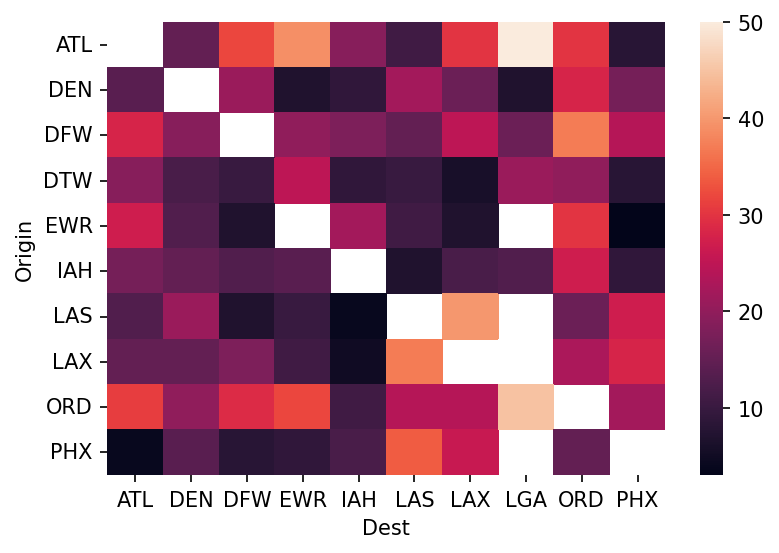

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=150)
sns.heatmap(matriz)

# VISUALIZACION 3

In [347]:
df = pd.read_csv("/content/data/flight_delays_train.csv")

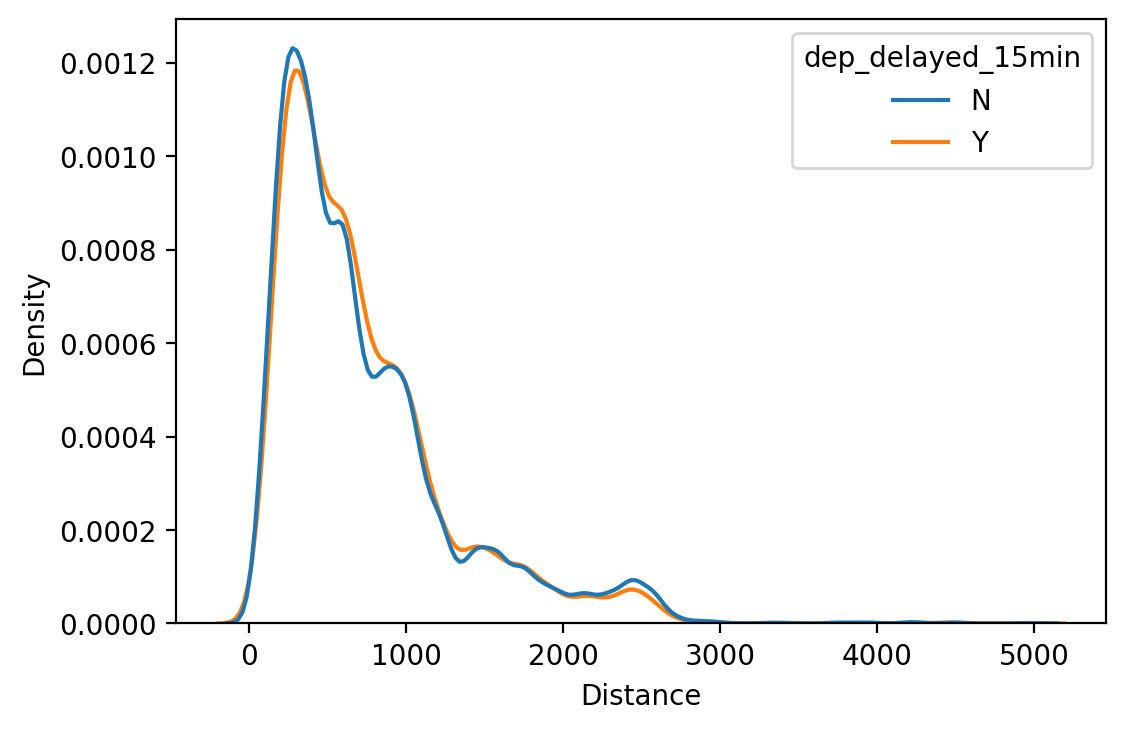

In [350]:
df = df[["Distance", "dep_delayed_15min"]]
plt.figure(dpi=200)
sns.kdeplot(x='Distance', data=df, hue='dep_delayed_15min', common_norm=False);
